In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling ## For easy profiling of pandas DataFrame
import missingno as msno ## Missing value co-occurance analysis
sys.path.append(os.path.abspath("../src/"))
%matplotlib inline

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
 

In [2]:
from generic_data_exploration import *
from generic_preprocessing import *

In [3]:
train =pd.read_csv('../data/raw/train.csv',index_col='PassengerId')
test =pd.read_csv('../data/raw/test.csv',index_col='PassengerId')
train['source']='train'
test['source']='test'
test['Survived']=-888

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
source      418 non-null object
Survived    418 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 42.5+ KB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
source      891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [6]:
df = pd.concat((train,test),axis=0,sort=False)

In [7]:
print(df.info())
print(test.shape, train.shape, df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
source      1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB
None
(418, 12) (891, 12) (1309, 12)


In [8]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [9]:
do_data_profiling(df,'../reports/titanic_data_profiling.html')

Data profiling done


In [10]:
do_simple_data_profiling(df)

Missing Value
Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
source         0
dtype: int64


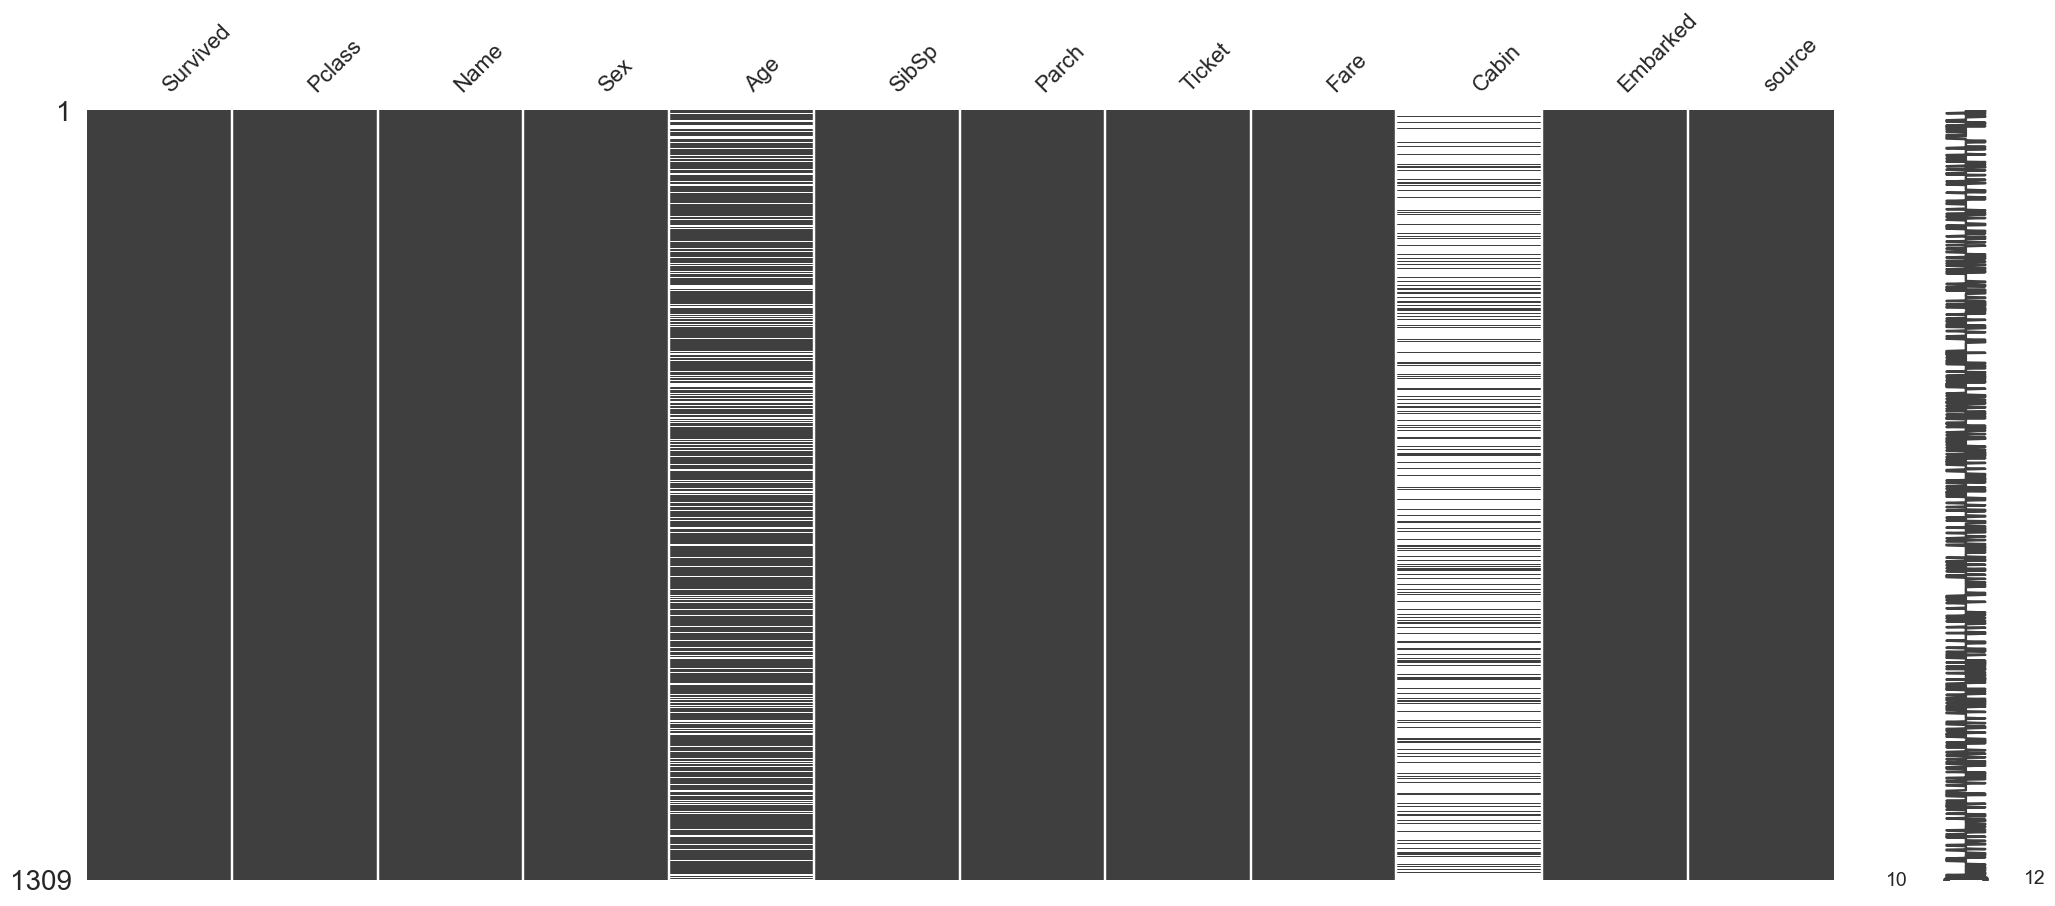

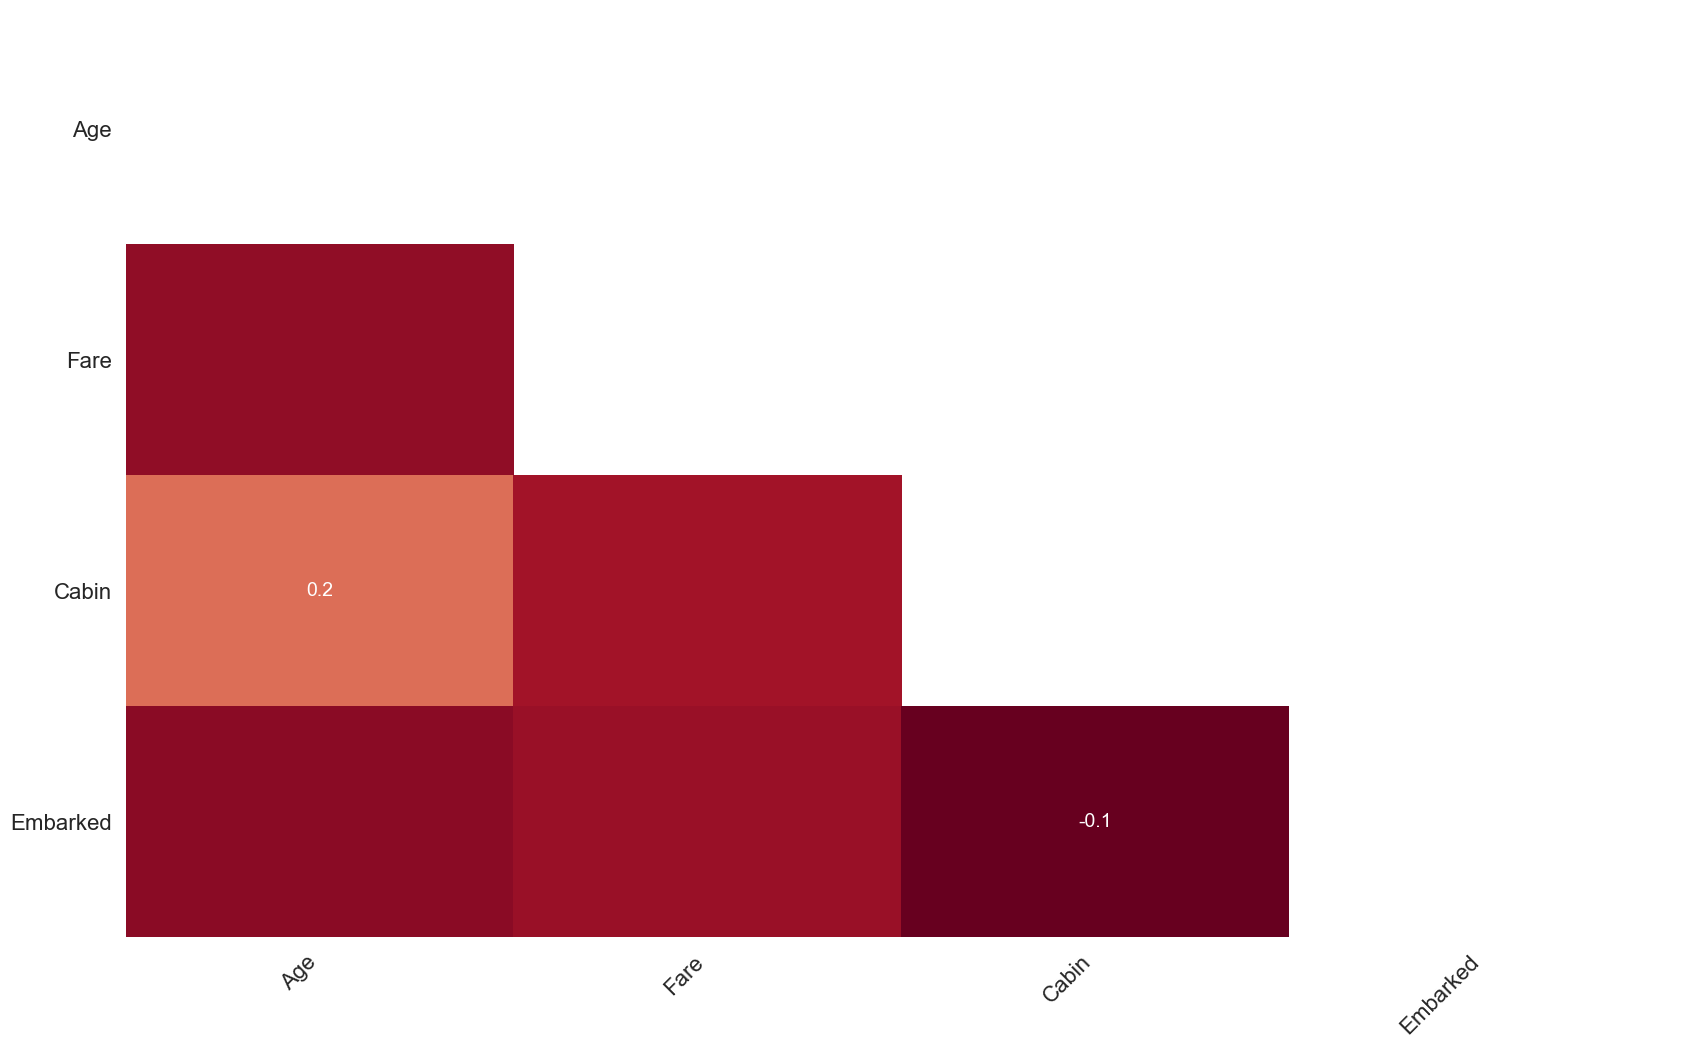

In [11]:
missing_value_analysis(df)

In [12]:
print_dataunique(df)

0 Survived int64 3 [   0    1 -888]
1 Pclass int64 3 [3 1 2]
2 Name object 1307 ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']
3 Sex object 2 ['male' 'female']
4 Age float64 99 [22. 38. 26. 35. nan]
5 SibSp int64 7 [1 0 3 4 2]
6 Parch int64 8 [0 1 2 5 3]
7 Ticket object 929 ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']
8 Fare float64 282 [ 7.25   71.2833  7.925  53.1     8.05  ]
9 Cabin object 187 [nan 'C85' 'C123' 'E46' 'G6']
10 Embarked object 4 ['S' 'C' 'Q' nan]
11 source object 2 ['train' 'test']


## Treating Missing Values

### option 1 : replace all missing age with mean value

In [13]:
#treat_missing_numeric(df,['Age'],how = 'mean')

### option 2 : replace with median age of gender

In [14]:
df.groupby(by='Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


In [15]:
df.groupby(by='Sex')['Age'].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [16]:
#replace 
age_sex_median = df.groupby('Sex').Age.transform('median')
df.Age.fillna(age_sex_median, inplace=True)

In [17]:
df[df['Fare'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
PassengerId,,,,,,,,,,,,
1044,-888,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


In [18]:
pclass_emb_age_mean_fare=df[(df['Pclass']==3) & (df['Embarked']=='S') &(df['Age']>=50) ].Fare.mean()
df.Fare.fillna(pclass_emb_age_mean_fare, inplace=True)

In [19]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,train
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,train


In [20]:
#df[(df['Pclass']==1) & (df['SibSp']==0)& (df['Parch']==0)& (df['Sex']=='female')]

In [21]:
treat_missing_categorical(df,['Embarked'],how='mode')

Filling missing values with mode for columns - Embarked


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,train
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,train
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,train


## Feature Engineering

#### Feature : Age State ( Adult or Child )

In [22]:
df['AgeState']=np.where(df['Age']>=18,'Adult','Child')

In [23]:
df['AgeState'].value_counts()

Adult    1155
Child     154
Name: AgeState, dtype: int64

In [24]:
pd.crosstab(df[df['Survived']!=-888]['AgeState'],df[df['Survived']!=-888]['Survived'])

Survived,0,1
AgeState,,
Adult,497,281
Child,52,61


#### Feature : FamilySize

In [25]:
df['FamilySize']=df['SibSp']+df['Parch']

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Adult,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Adult,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Adult,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Adult,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Adult,0


In [27]:
pd.crosstab(df[df['Survived']!=-888]['FamilySize'],df[df['Survived']!=-888]['Survived'])

Survived,0,1
FamilySize,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


#### Feature : Title

In [28]:
df['Name'].str.split(",")[1]

['Braund', ' Mr. Owen Harris']

In [29]:
def GetTitle(name):
    title_group={'mr':'Mr'
           , 'mrs':'Mrs'
           , 'miss':'Miss'
           , 'master':'Master'
           , 'don':'Sir'
           , 'rev':'Sir'
           , 'dr':'Officer'
           , 'mme':'Mrs'
           , 'ms':'Miss'
           ,'major':'Officer'
           , 'lady':'Lady'
           , 'sir':'Sir'
           , 'mlle':'Miss'
           , 'col':'Officer'
           , 'capt':'Officer'
           , 'the countess':'Lady'
           ,'jonkheer':'Sir'
           , 'dona':'Lady'}
    Title = name.split(",")[1].split(".")[0].strip().lower()
    return title_group[Title]

In [30]:
df['Title']=df['Name'].apply(lambda x:GetTitle(x))

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,AgeState,FamilySize,Title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Adult,1,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Adult,1,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Adult,0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Adult,1,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Adult,0,Mr


In [32]:
pd.crosstab(df[df['Survived']!=-888]['Title'],df[df['Survived']!=-888]['Survived'])

Survived,0,1
Title,,
Lady,0,2
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Officer,7,5
Sir,8,1


In [33]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high'])

#### Feature : IsMother

In [34]:
df['IsMother']=np.where((df['Age']>=18) & (df['Parch']>0 &(df['Sex']=='female') & (df['Title']!='Miss')),1,0)

In [35]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,AgeState,FamilySize,Title,Fare_Bin,IsMother
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,Adult,1,Mr,very_low,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,Adult,1,Mrs,very_high,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,Adult,0,Miss,low,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,Adult,1,Mrs,very_high,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,Adult,0,Mr,low,0


In [36]:
pd.crosstab(df[df['Survived']!=-888]['IsMother'],df[df['Survived']!=-888]['Survived'])

Survived,0,1
IsMother,,
0,481,278
1,68,64


#### Deck

In [37]:
def Get_Deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z') 

In [38]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
df['Deck']=df['Cabin'].map(lambda x :Get_Deck(x))

In [40]:
df['Deck'].value_counts()

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Deck, dtype: int64

In [41]:
# set the value to NaN
df.loc[df.Deck == 'T', 'Deck'] = 'Z'

In [42]:
df.loc[df['Cabin']=='T']


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,AgeState,FamilySize,Title,Fare_Bin,IsMother,Deck
PassengerId,,,,,,,,,,,,,,,,,,
340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,train,Adult,0,Mr,very_high,0,Z


In [43]:
df['Deck'].value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 18 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
source        1309 non-null object
AgeState      1309 non-null object
FamilySize    1309 non-null int64
Title         1309 non-null object
Fare_Bin      1309 non-null category
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(9)
memory usage: 220.4+ KB


In [45]:
#Print distinct value of categories columns
categories_columns = ['Sex','Embarked','Deck','Title','AgeState','Fare_Bin']

for catg in categories_columns:
    print("distinct value of {catg}:{values}".format(catg=catg,values=df[catg].unique()))

distinct value of Sex:['male' 'female']
distinct value of Embarked:['S' 'C' 'Q']
distinct value of Deck:['Z' 'C' 'E' 'G' 'D' 'A' 'B' 'F']
distinct value of Title:['Mr' 'Mrs' 'Miss' 'Master' 'Sir' 'Officer' 'Lady']
distinct value of AgeState:['Adult' 'Child']
distinct value of Fare_Bin:[very_low, very_high, low, high]
Categories (4, object): [very_low < low < high < very_high]


In [46]:
#fare_bin = pd.get_dummies(df['Fare_Bin'],drop_first=True)

In [47]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)
deck = pd.get_dummies(df['Deck'],drop_first=True)
title = pd.get_dummies(df['Title'],drop_first=True)
agestate=pd.get_dummies(df['AgeState'],drop_first=True)
#fare_bin = pd.get_dummies(df['Fare_Bin'],drop_first=True)

In [48]:
agestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 1 columns):
Child    1309 non-null uint8
dtypes: uint8(1)
memory usage: 51.5 KB


In [49]:
df.drop(['Sex','Embarked','Name','Ticket','Cabin','Title','AgeState','Deck','Fare_Bin'],axis=1,inplace=True)
#df.drop(['Title'],axis=1,inplace=True)
#df.drop(['Age State'],axis=1,inplace=True)
#df.drop(['Deck'],axis=1,inplace=True)
#df.drop(['Fare_Bin'],axis=1,inplace=True)

In [50]:
df = pd.concat([df,sex,embark,title,agestate],axis=1)

In [51]:
#df = pd.concat([df,fare_bin],axis=1)

In [52]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,source,FamilySize,IsMother,male,Q,S,Master,Miss,Mr,Mrs,Officer,Sir,Child
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,train,1,0,1,0,1,0,0,1,0,0,0,0
2,1,1,38.0,1,0,71.2833,train,1,0,0,0,0,0,0,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,train,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,35.0,1,0,53.1000,train,1,0,0,0,1,0,0,0,1,0,0,0
5,0,3,35.0,0,0,8.0500,train,0,0,1,0,1,0,0,1,0,0,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 19 columns):
Survived      1309 non-null int64
Pclass        1309 non-null int64
Age           1309 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Fare          1309 non-null float64
source        1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
male          1309 non-null uint8
Q             1309 non-null uint8
S             1309 non-null uint8
Master        1309 non-null uint8
Miss          1309 non-null uint8
Mr            1309 non-null uint8
Mrs           1309 non-null uint8
Officer       1309 non-null uint8
Sir           1309 non-null uint8
Child         1309 non-null uint8
dtypes: float64(2), int32(1), int64(5), object(1), uint8(10)
memory usage: 149.9+ KB


In [54]:
do_simple_data_profiling(df)

Missing Value
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
source        0
FamilySize    0
IsMother      0
male          0
Q             0
S             0
Master        0
Miss          0
Mr            0
Mrs           0
Officer       0
Sir           0
Child         0
dtype: int64


## Model generation

In [55]:
train_df = df[df['source']=='train']
test_df = df[df['source']=='test']

In [56]:
test_df=test_df.copy()
test_df.drop(['Survived'],axis=1,inplace=True)
train_df.drop(['source'],axis=1,inplace=True)
test_df.drop(['source'],axis=1,inplace=True)

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsMother,male,Q,S,Master,Miss,Mr,Mrs,Officer,Sir,Child
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0,1,0,0,0,0
2,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,0,1,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,1,0,1,0,0,0,0,0
4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,1,0,0,0
5,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0,0,0


In [58]:
import lime
import lime.lime_tabular
print(os.path.abspath("../src"))
from ml_classification import *

D:\2018\GIT\Projects\titanic1\src


In [59]:
X_train, X_test, y_train, y_test = holdout_cv(data_processed,y_label,size =0.3)

NameError: name 'data_processed' is not defined

In [60]:
from sklearn.model_selection import train_test_split
def holdout_cv(X,y,size = 0.3, seed = 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = seed)
    return X_train, X_test, y_train, y_test

In [61]:
X=train_df[['Pclass','Age','SibSp','Parch','Fare','FamilySize','IsMother','male','Q','S','Master','Miss','Mr','Mrs','Officer','Sir','Child']]
y=train_df[['Survived']]

In [62]:
X_train, X_test, y_train, y_test = holdout_cv(X,y)

In [63]:
## Running an Xgboost model to understand basic parameters tuning
_,_,_,_ = runSVC(X_train, y_train, X_test, y_test)

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train and Test loss :  0.9373692875895518 0.7735152031827224


In [64]:
train_df = df[df['source']=='train']
test_df = df[df['source']=='test']

In [65]:
test_df=test_df.copy()
test_df.drop(['Survived'],axis=1,inplace=True)
train_df.drop(['source'],axis=1,inplace=True)
test_df.drop(['source'],axis=1,inplace=True)

c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [66]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsMother,male,Q,S,Master,Miss,Mr,Mrs,Officer,Sir,Child
PassengerId,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,0,0,1,1,0,0,0,1,0,0,0,0
893,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,1,0,0,0
894,2,62.0,0,0,9.6875,0,0,1,1,0,0,0,1,0,0,0,0
895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0,0,0,0
896,3,22.0,1,1,12.2875,2,1,0,0,1,0,0,0,1,0,0,0


In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
### Running Logistic Regression
def runLR(train_X, train_y, test_X, test_y=None, test_X2=None, C=1.0, penalty ='l1'):
    model = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]

    test_preds2 = 0
    if test_X2 is not None:
        test_preds2 = model.predict_proba(test_X2)[:,1]
    test_loss = 0
    
    train_loss = metrics.roc_auc_score(train_y, train_preds)
    test_loss = metrics.roc_auc_score(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2, model


In [ ]:
from sklearn.model_selection import train_test_split
def holdout_cv(X,y,size = 0.3, seed = 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size, random_state = seed)
    return X_train, X_test, y_train, y_test

In [ ]:
X=train_df[['Pclass','Age','SibSp','Parch','Fare','FamilySize','IsMother','male','Q','S','Master','Miss','Mr','Mrs','Officer','Sir','Child']]
y=train_df[['Survived']]

In [ ]:
# create model
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
# train model
logmodel.fit(X_train,y_train.values.ravel())

In [ ]:
 # make predictions
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
# evaluate model
print(classification_report(y_test,predictions))

In [ ]:
# evaluate model
print ('score for logistic regression : {0:.2f}'.format(logmodel.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
# performance metrics
# accuracy
print ('accuracy for logistic regression - version 1 : {0:.2f}'.format(accuracy_score(y_test, logmodel.predict(X_test))))
# confusion matrix
print ('confusion matrix for logistic regression - version 1: \n {0}'.format(confusion_matrix(y_test, logmodel.predict(X_test))))
# precision 
print ('precision for logistic regression - version 1 : {0:.2f}'.format(precision_score(y_test, logmodel.predict(X_test))))
# precision 
print ('recall for logistic regression - version 1 : {0:.2f}'.format(recall_score(y_test, logmodel.predict(X_test))))

In [ ]:
# model coefficients
logmodel.coef_

In [ ]:
def get_submission_file(model, filename):
    # converting to the matrix
    test_X = test_df.as_matrix().astype('float')
    # make predictions
    predictions = model.predict(test_X)
    # submission dataframe
    df_submission = pd.DataFrame({'PassengerId': test_df.index, 'Survived' : predictions})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path, filename)
    # write to the file
    df_submission.to_csv(submission_file_path, index=False)

In [ ]:
# get submission file
get_submission_file(logmodel, '04_lr.csv')

### Hyperparameter Optimization

In [ ]:
# base model 
logmodel1 = LogisticRegression(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'C':[1.0, 10.0,20.0, 50.0, 100.0, 1000.0], 'penalty' : ['l1','l2']}
clf = GridSearchCV(logmodel1, param_grid=parameters, cv=3)

In [ ]:
clf.fit(X_train, y_train.values.ravel())

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
print ('best score : {0:.2f}'.format(clf.best_score_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfcmodel = RandomForestClassifier(max_depth= 10, n_estimators=20,min_samples_leaf=5,min_samples_split=2,
                    n_jobs = -1,
                    random_state = 0)

In [ ]:
#tuned_parameters  = {'n_estimators':[1, 10,20, 50, 100, 1000],'max_depth' : [5,10,20,30,40,50]}
#clf = GridSearchCV(rfcmodel, param_grid=parameters, cv=3)

In [ ]:
rfcmodel.fit(X_train, y_train.values.ravel())

In [ ]:
clf.best_params_

In [ ]:
# get submission file
get_submission_file(rfcmodel, '05_rfc1.csv')

In [ ]:
print ('best score : {0:.2f}'.format(clf.best_score_))

In [ ]:
tuned_parameters  = {'n_estimators':[1, 10,20],'max_depth' : [5,10,20],'min_samples_split':[2,4,6],'min_samples_leaf':[5]}

In [ ]:
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train.values.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

In [ ]:
import xgboost as xgb 
import lightgbm as lgb 
from sklearn import metrics 

In [ ]:
def runXGB(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, 
           rounds=500, dep=8, eta=0.5,sub_sample=0.7,col_sample=0.7,
           min_child_weight_val=1, silent_val = 1):
    params = {}
    params["objective"] = "binary:logistic"
    params['eval_metric'] = 'auc'
    params["eta"] = eta
    params["subsample"] = sub_sample
    params["min_child_weight"] = min_child_weight_val
    params["colsample_bytree"] = col_sample
    params["max_depth"] = dep
    params["silent"] = silent_val
    params["seed"] = seed_val
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)
    
    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    
    pred_test_y2 = 0
    if test_X2 is not None:
        pred_test_y2 = model.predict(xgb.DMatrix(test_X2), ntree_limit=model.best_ntree_limit)
    
    loss = 0
    if test_y is not None:
        loss = metrics.roc_auc_score(test_y, pred_test_y)
        return pred_test_y, loss, pred_test_y2, model
    else:
        return pred_test_y, loss, pred_test_y2, model
### Running Xgboost classifier for model explaination
def runXGBC(train_X, train_y, test_X, test_y=None, test_X2=None, seed_val=0, 
            rounds=500, dep=8, eta=0.5,sub_sample=0.7,col_sample=0.7,
            min_child_weight_val=1, silent_val = 1):
    model = xgb.XGBClassifier(objective="binary:logistic",
                              learning_rate=eta,
                              subsample=sub_sample,
                              min_child_weight=min_child_weight_val,
                              colsample_bytree=col_sample,
                              max_depth=dep,
                              silent=silent_val,
                              seed=seed_val,
                              n_estimators=rounds)

    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:,1]
    test_preds = model.predict_proba(test_X)[:,1]
    
    test_preds2 = 0
    if test_X2 is not None:
        test_preds2 = model.predict_proba(test_X2)[:,1]

    test_loss = 0
    if test_y is not None:
        train_loss = metrics.roc_auc_score(train_y, train_preds)
        test_loss = metrics.roc_auc_score(test_y, test_preds)
        print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2, model

In [ ]:
## Running an Xgboost model to understand basic parameters tuning
_,_,_,_ = runXGB(X_train, y_train, X_test, y_test)

In [ ]:
pred_y_test, loss,_,xgb_model = runXGBC(X_train.values, y_train.values.ravel(), X_test.values, y_test,rounds=27)

In [ ]:
# performance metrics
# accuracy
print ('accuracy for logistic regression - version 1 : {0:.2f}'.format(accuracy_score(y_test, xgb_model.predict(X_test))))
# confusion matrix
print ('confusion matrix for logistic regression - version 1: \n {0}'.format(confusion_matrix(y_test, xgb_model.predict(X_test))))
# precision 
print ('precision for logistic regression - version 1 : {0:.2f}'.format(precision_score(y_test, xgb_model.predict(X_test))))
# precision 
print ('recall for logistic regression - version 1 : {0:.2f}'.format(recall_score(y_test, xgb_model.predict(X_test))))

In [ ]:
# get submission file
get_submission_file(xgb_model, '07_xgb1.csv')

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [ ]:
model = XGBClassifier(max_depth=3, n_estimators=49, learning_rate=0.5)
model.fit(X_train, y_train.values.ravel())
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
y_pred

In [ ]:
# get submission file
get_submission_file(model, '08_xgbc.csv')

In [ ]:
# performance metrics
# accuracy
print ('accuracy for logistic regression - version 1 : {0:.2f}'.format(accuracy_score(y_test, model.predict(X_test))))
# confusion matrix
print ('confusion matrix for logistic regression - version 1: \n {0}'.format(confusion_matrix(y_test, model.predict(X_test))))
# precision 
print ('precision for logistic regression - version 1 : {0:.2f}'.format(precision_score(y_test, model.predict(X_test))))
# precision 
print ('recall for logistic regression - version 1 : {0:.2f}'.format(recall_score(y_test, model.predict(X_test))))

In [67]:
# Load libraries
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [68]:
# Test options and evaluation metric
seed = 0
scoring = 'accuracy'

In [69]:
models = []

models.append(('LR', LogisticRegression(C=1.0,penalty='l2')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier(n_estimators = 30,
                    max_depth = 10,
                    min_samples_split = 2,
                    min_samples_leaf = 10,
                    max_features =  0.2,
                    n_jobs = -1,
                    random_state = 100)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.831452 (0.007005)
LDA: 0.839473 (0.006360)
KNN: 0.706289 (0.012974)
CART: 0.764044 (0.007869)
NB: 0.762511 (0.044332)


c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\saurabh\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


SVM: 0.728787 (0.024707)
RFC: 0.817014 (0.015707)
